In [0]:
import glob
import os
import pandas as pd
import seaborn as sns
import re

import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
models_stats_dirs = ['/gdrive/My Drive/stats_bert_noisy_networks_large',
                     '/gdrive/My Drive/model_stats',
                     '/gdrive/My Drive/stats_starting_kit_no_im',
                     '/gdrive/My Drive/stats_bert_noisy_networks',
                     '/gdrive/My Drive/stats_bert_no_im'
                    ]

In [0]:
!ls '/gdrive/My Drive/stats_starting_kit_no_im'

game_0.csv  game_2.csv	game_4.csv  game_6.csv	game_8.csv
game_1.csv  game_3.csv	game_5.csv  game_7.csv	game_9.csv


In [0]:
def gather_models_stats_files(models_stats_dirs):
    models_stats_files = {}
    for stats_dir in models_stats_dirs:
        stats_files = glob.glob(os.path.join(stats_dir, "*.csv"))
        if len(stats_files) == 0:
            break
        has_name = re.search(r'\/game_[0-9]+\.csv$', stats_files[0])
        if has_name:
            model_name = os.path.basename(stats_dir)
            models_stats_files[model_name] = stats_files
        else:
            for stat in stats_files:
                match = re.match(r'^.*\/([a-z_-]+)\_\d+.csv$', stat)
                model_name = match.group(1)
                models_stats_files[model_name] = models_stats_files.get(model_name, []) + [stat]
                
    for _, arr in models_stats_files.items():
        arr.sort(key=lambda x: int(re.sub(r'^.*_(\d+).csv$', r'\1', x)))
    return models_stats_files

In [0]:
models_stats_files = gather_models_stats_files(models_stats_dirs)

In [0]:
stats_attr = ['epoch','score','steps','loss','eps'] #,'state']

def make_stats_df(models_stats_files):
    to_df = lambda csv_file: pd.read_csv(csv_file, index_col=0, usecols=stats_attr)
    return { key: [ to_df(stat_file) for stat_file in val]
             for key, val in models_stats_files.items() }

In [0]:
stats = make_stats_df(models_stats_files)
mean_stats = { key: sum(val)/len(val) for key, val in stats.items() }

In [0]:
list(mean_stats.keys())

['stats_bert_noisy_networks_large',
 'lstm-ddqn-noisy-action-space',
 'stats_starting_kit_no_im',
 'stats_bert_noisy_networks',
 'stats_bert_no_im']

In [0]:
stats2graph = ['score','steps','loss']
def make_plot(stats_df, title='', fig_size=(22, 5)):
    fig, axes = plt.subplots(nrows=1, ncols=len(stats2graph), figsize=fig_size)
    fig.suptitle(title)
    fig.subplots_adjust(hspace=1)
    for ax, stat in zip(axes, stats2graph):
        sns.lineplot(x=list(stats_df.index), y=stats_df[stat], ax=ax)

MIN: 27


KeyError: ignored

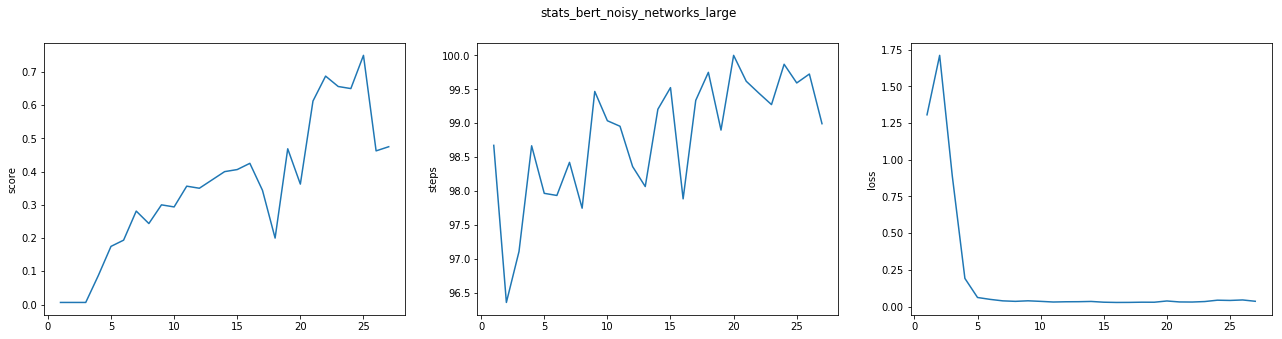

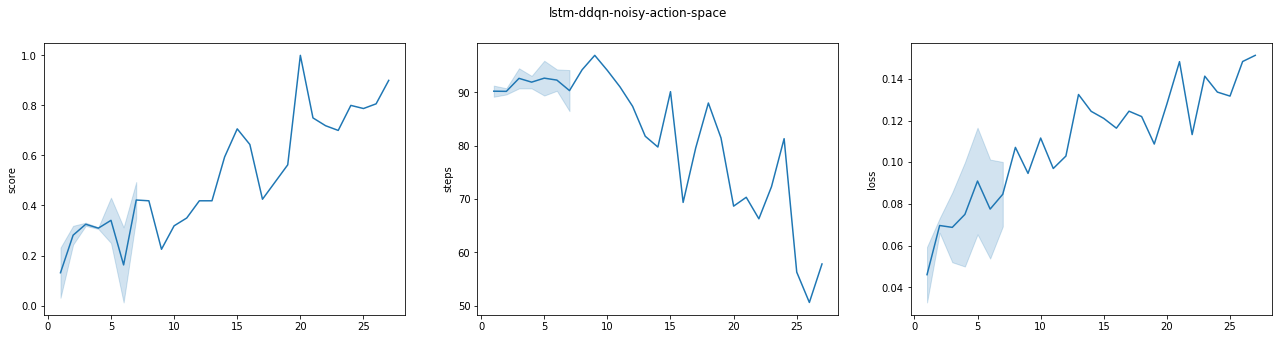

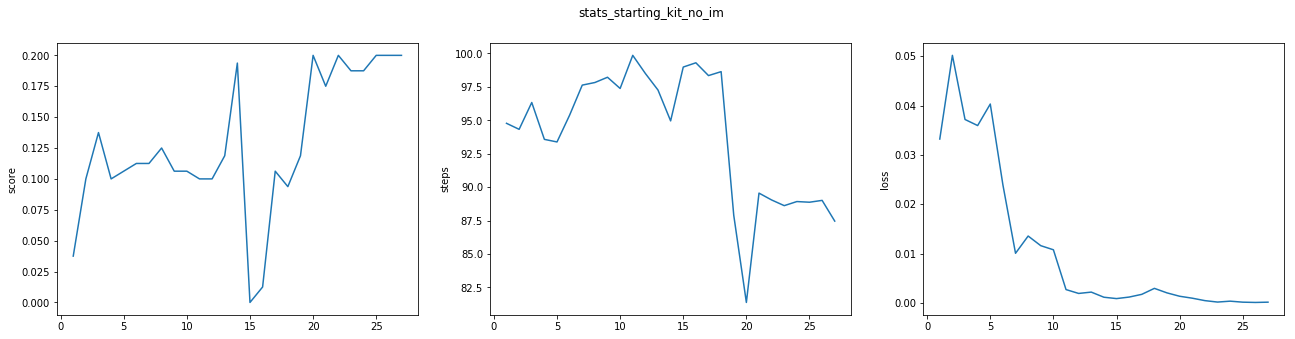

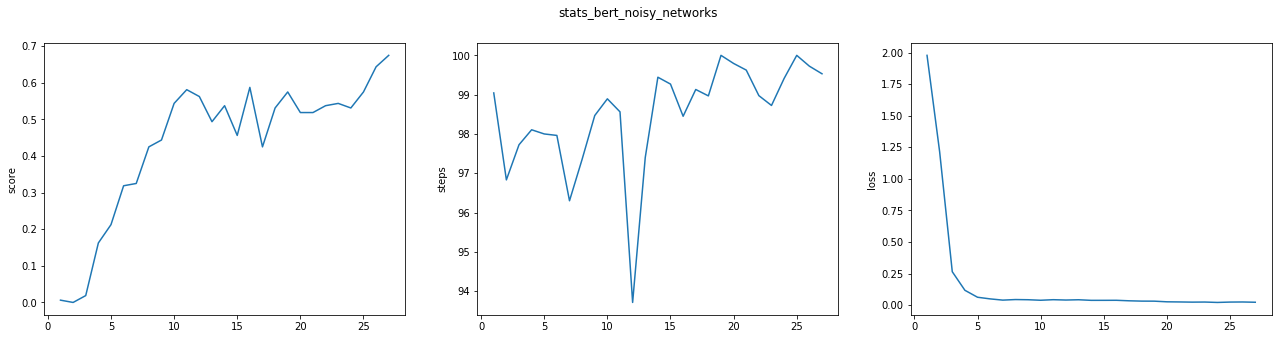

In [0]:
min_epoch = min([ len(i) for i in mean_stats.values()]) -2
print("MIN: {}".format(min_epoch))
for i in mean_stats.keys():
    make_plot(mean_stats[i].loc[:min_epoch, :], title=i)